## Attempting to add the Styx stream to my BooIII model
### will be using MWPotential2014 as well as Andrew Pace's 6D data

In [2]:
from galpy.orbit import Orbit
from galpy import potential
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
from matplotlib import animation
from IPython.display import HTML
from galpy.potential import MWPotential2014
from galpy.util import conversion
from streamtools.df import streamspraydf

from stream_package.stream_package import graphics

/home/student04/.local/lib/python3.10/site-packages/galpy/util/bovy_conversion.py:6: FutureWarning: galpy.util.bovy_conversion is being deprecated in favor of galpy.util.conversion; all functions in there are the same; please switch to the new import, because the old import will be removed in v1.9
  warnings.warn('galpy.util.bovy_conversion is being deprecated in favor of galpy.util.conversion; all functions in there are the same; please switch to the new import, because the old import will be removed in v1.9',FutureWarning)

/home/student04/.local/lib/python3.10/site-packages/galpy/util/bovy_coords.py:6: FutureWarning: galpy.util.bovy_coords is being deprecated in favor of galpy.util.coords; all functions in there are the same; please switch to the new import, because the old import will be removed in v1.9
  warnings.warn('galpy.util.bovy_coords is being deprecated in favor of galpy.util.coords; all functions in there are the same; please switch to the new import, because the old impo

In [9]:
# Galpy scaling factors
ro = 8.
vo = 220.
to = conversion.time_in_Gyr(ro = ro, vo = vo)
mo = conversion.mass_in_msol(ro = ro, vo = vo)


# Boo3 properties to model stream:
mass = 1.82E7 * 5 
tdisrupt = 5
nstar = 100

pot = MWPotential2014

sixD_pace = [209.3, 26.8, 46.5, -1.176, -0.89, 197.5]
o = Orbit(vxvv = sixD_pace, ro=ro, vo=vo, solarmotion = [-11.1, 24.0, 7.25], radec=True)

# Styx properties- hopefully
sixD_prograde = [209.1, 26.8, 45, -0.23, -0.6, -42]
sixD_retrograde = [209.1, 26.8, 45, -1.05, -0.95, -22]
osp = Orbit(vxvv = sixD_prograde, ro=ro, vo=vo, solarmotion = [-11.1, 24.0, 7.25], radec=True)
osr = Orbit(vxvv = sixD_retrograde, ro=ro, vo=vo, solarmotion = [-11.1, 24.0, 7.25], radec=True)

o.turn_physical_off()
osp.turn_physical_off()
osr.turn_physical_off()

In [11]:
# Model stream of Boo3
oall, oleading, otrailing, dtall, dt, dtt = graphics.streamorbits(mass, o, tdisrupt, pot, nstar)

In [17]:
# Integrating orbits
delt = np.linspace(0, -tdisrupt/to, 1000)

o.integrate(tint, pot)
osp.integrate(tint, pot)
osr.integrate(tint, pot)

## Prograde orbit

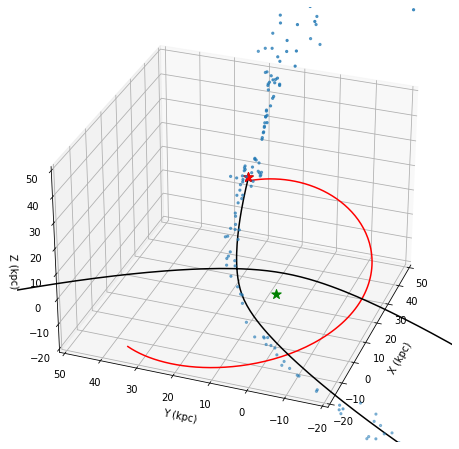

In [26]:
# 3D projection in x,y,z
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')
ax.scatter(oall.x(), oall.y(), oall.z(), marker='.')
ax.scatter(o.x()*ro, o.y()*ro, o.z()*ro, marker='*', c='k', s = 100)

# Plotting the stream orbit
ax.plot(osp.x(delt[:150])*ro, osp.y(delt[:150])*ro, osp.z(delt[:150])*ro, c='r')
ax.scatter(o.x()*ro, o.y()*ro, o.z()*ro, marker='*', c='r', s = 100)

# plotting the orbit of Boo3 over past 5yrs
ax.plot(o.x(delt)*ro, o.y(delt)*ro, o.z(delt)*ro, c = 'k')

# Adding the centre of MW:
ax.scatter(0,0,0, marker = '*', c='g', s=100)

ax.set_xlabel('X (kpc)')
ax.set_ylabel('Y (kpc)')
ax.set_zlabel('Z (kpc)')

ax.set_xlim(-20,50)
ax.set_ylim(-20,50)
ax.set_zlim(-20,50)

ax.view_init(30,200)
plt.show()

## Retrograde orbit

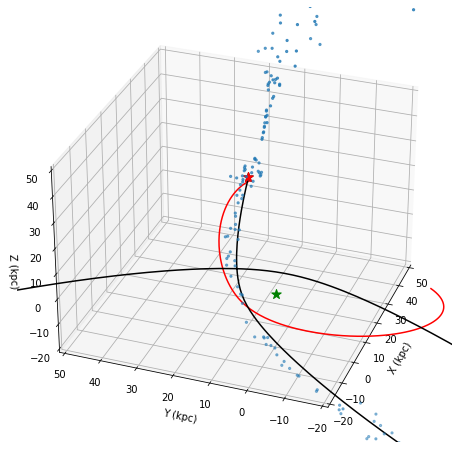

In [27]:
# 3D projection in x,y,z
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')
ax.scatter(oall.x(), oall.y(), oall.z(), marker='.')
ax.scatter(o.x()*ro, o.y()*ro, o.z()*ro, marker='*', c='k', s = 100)

# Plotting the stream orbit
ax.plot(osr.x(delt[:150])*ro, osr.y(delt[:150])*ro, osr.z(delt[:150])*ro, c='r')
ax.scatter(o.x()*ro, o.y()*ro, o.z()*ro, marker='*', c='r', s = 100)

# plotting the orbit of Boo3 over past 5yrs
ax.plot(o.x(delt)*ro, o.y(delt)*ro, o.z(delt)*ro, c = 'k')

# Adding the centre of MW:
ax.scatter(0,0,0, marker = '*', c='g', s=100)

ax.set_xlabel('X (kpc)')
ax.set_ylabel('Y (kpc)')
ax.set_zlabel('Z (kpc)')

ax.set_xlim(-20,50)
ax.set_ylim(-20,50)
ax.set_zlim(-20,50)


ax.view_init(30,200)
plt.show()

Text(0, 0.5, 'Z (kpc)')

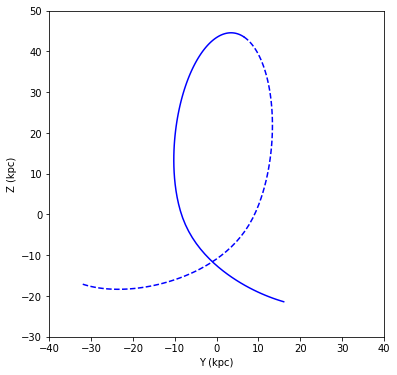

In [41]:
osr_fwd = osr()
delt_fwd = np.linspace(0, tdisrupt/to, 1000)
osr_fwd.integrate(delt_fwd, pot)

fig = plt.figure(figsize=(6,6))
plt.plot(osr.y(delt[:100])*ro,osr.z(delt[:100])*ro, 'b--')
plt.plot(osr_fwd.y(delt_fwd[:100])*ro, osr_fwd.z(delt_fwd[:100])*ro, 'b-')
plt.xlim(-40, 40)
plt.ylim(-30, 50)
plt.xlabel('Y (kpc)')
plt.ylabel('Z (kpc)')